# Notebook #3: Gestión de Outliers

In [ ]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_preprocesamiento as sp

- Importamos el dataframe generado en el notebook anterior.

In [2]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo4/df_encoded.pkl')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,0.159847,0.159847,6,0.159847,0.159847,0.159847,0.159847,0.159847,0.159847,131160,1.0,11,0.159847,1.0,0.159847,1,0,0,0.159847,0.159847,0.159847,0.159847,0.159847
1,31,1,0.159847,0.159847,10,0.159847,0.079923,0.079923,0.079923,0.159847,0.159847,41890,0.0,23,0.159847,6.0,0.159847,5,1,4,0.079923,0.159847,0.159847,0.159847,0.159847
2,32,0,0.579923,0.579923,17,0.159847,0.159847,0.159847,0.159847,0.159847,0.079923,193280,1.0,15,0.159847,5.0,0.159847,5,0,3,0.159847,0.579923,0.159847,0.079923,0.079923
3,38,0,0.159847,0.386616,2,0.159847,0.386616,0.079923,0.159847,0.159847,0.053282,83210,3.0,11,0.079923,13.0,0.159847,8,7,5,0.159847,0.079923,0.159847,0.579923,0.053282
4,32,0,0.079923,0.289962,10,0.579923,0.159847,0.053282,0.386616,0.079923,0.579923,23420,4.0,12,0.159847,9.0,0.079923,6,0,4,0.079923,0.159847,0.079923,0.053282,0.039962


- Transformamos las columnas que deben ser categóricas pero durante el encoding se han convertido en numéricas.

In [3]:
df[['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating']] = df[['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'StockOptionLevel', 'TrainingTimesLastYear', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement',
       'PerformanceRating']].astype(str)

In [ ]:
col_numericas = df.select_dtypes(include=np.number).columns
contaminacion = [0.01, 0.05]
estimadores = [25, 50, 75]

outliers = sp.outliers_isolation_forest(df, contaminacion, estimadores)
outliers.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,outliers_ifo_0.01_25,outliers_ifo_0.01_50,outliers_ifo_0.01_75,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75
0,51,0,0.159846547314578,0.159846547314578,6,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,131160,1.0,11,0.159846547314578,1.0,0.159846547314578,1,0,0,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1,1,1,1,1,1
1,31,1,0.159846547314578,0.159846547314578,10,0.159846547314578,0.079923273657289,0.079923273657289,0.079923273657289,0.159846547314578,0.159846547314578,41890,0.0,23,0.159846547314578,6.0,0.159846547314578,5,1,4,0.079923273657289,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,1,1,1,1,1,1
2,32,0,0.579923273657289,0.579923273657289,17,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.159846547314578,0.079923273657289,193280,1.0,15,0.159846547314578,5.0,0.159846547314578,5,0,3,0.159846547314578,0.579923273657289,0.159846547314578,0.079923273657289,0.079923273657289,1,1,1,1,1,1
3,38,0,0.159846547314578,0.38661551577152603,2,0.159846547314578,0.38661551577152603,0.079923273657289,0.159846547314578,0.159846547314578,0.05328218243819267,83210,3.0,11,0.079923273657289,13.0,0.159846547314578,8,7,5,0.159846547314578,0.079923273657289,0.159846547314578,0.579923273657289,0.05328218243819267,1,1,1,1,1,1
4,32,0,0.079923273657289,0.2899616368286445,10,0.579923273657289,0.159846547314578,0.05328218243819267,0.38661551577152603,0.079923273657289,0.579923273657289,23420,4.0,12,0.159846547314578,9.0,0.079923273657289,6,0,4,0.079923273657289,0.159846547314578,0.079923273657289,0.05328218243819267,0.0399616368286445,1,1,1,1,1,1


- Aplicaremos ahora un filtro para quedarmos con aquellos registros donde, 4 de 6 combinaciones resulten ser outliers.

In [5]:
cantidad_col = 4
df_filtrado = df[(df == -1).sum(axis=1) > cantidad_col]
df_filtrado.shape

(13, 31)

- Vemos que, nos hemos quedado sin outliers en el DF filtrado.

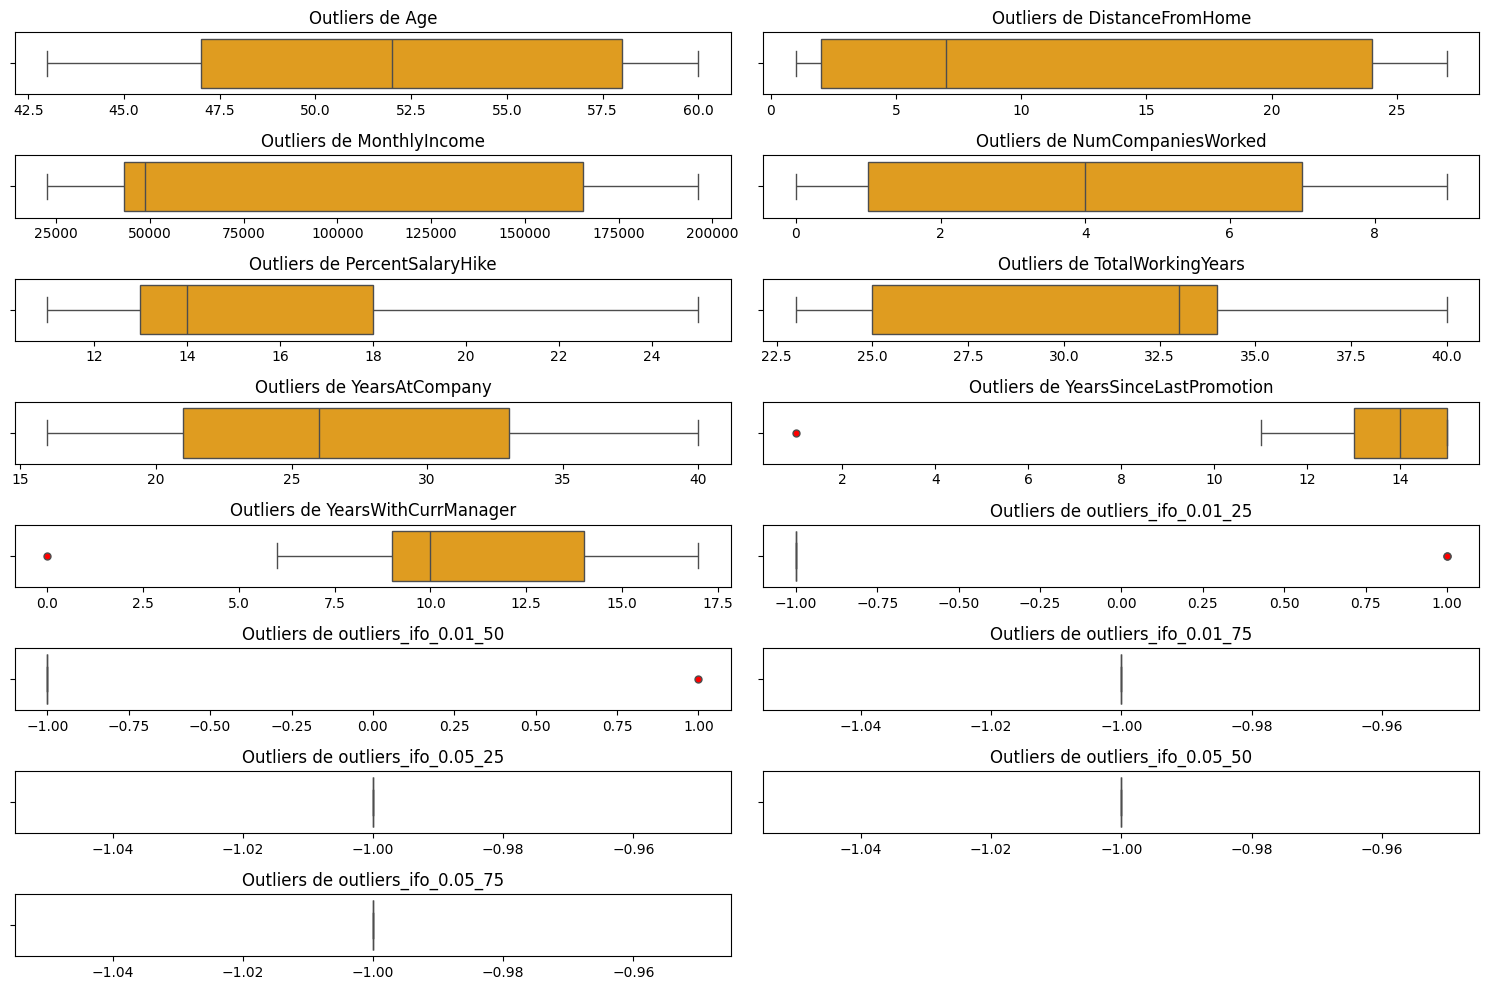

In [6]:
sp.detectar_outliers(df_filtrado)

- En total, hemos identificado sólamente 13 outliers, de un total de unos 1600 registros. Por ese motivo, en este segundo modelo, los eliminaremos del dataset.

In [7]:
df = df.drop(df_filtrado.index)

In [8]:
col_numericas

Index(['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

- Eliminamos las columnas que ha creado el método IFO.

In [9]:
df.drop(columns= ['outliers_ifo_0.01_25', 'outliers_ifo_0.01_50', 'outliers_ifo_0.01_75',
       'outliers_ifo_0.05_25', 'outliers_ifo_0.05_50', 'outliers_ifo_0.05_75'], inplace= True)

- Y guardamos el DF para llevarlo al siguiente paso: la estandarización.

In [10]:
with open('../../datos/pickles_transformados/modelo4/df_sinoutliers.pkl', 'wb') as f:
    pickle.dump(df, f)